### **Import Libraries**
This cell imports the necessary libraries and modules, such as TensorFlow, Keras, NumPy, and Matplotlib.

# Transfer Learning
## 1) Feature Extraction

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


### **Load and Preprocess Data**
Here we define the directories for the training and validation datasets, as well as initialize ImageDataGenerator instances for data preprocessing.

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


### **Data Extraction from Zip**
This file will extract the train and test data from zip

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing Libraries**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

### **Load Pre-trained Model**
In this cell, we load the VGG16 model pre-trained on ImageNet, excluding the top layers, and freeze the convolutional base.

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### **Add Custom Layers**
Here we add custom fully connected layers on top of the pre-trained base model to adapt it for our specific classification task.

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### **Compile the Model**
This cell compiles the model with a specified optimizer, loss function, and metrics.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Train the Model**
We train the model using the training and validation data generators, and store the training history.

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 94ms/step - loss: 0.2676 - accuracy: 0.8879 - val_loss: 0.2066 - val_accuracy: 0.9102
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1949 - accuracy: 0.9199 - val_loss: 0.2010 - val_accuracy: 0.9142
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1562 - accuracy: 0.9377 - val_loss: 0.2443 - val_accuracy: 0.8970
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1334 - accuracy: 0.9471 - val_loss: 0.3257 - val_accuracy: 0.8842
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1092 - accuracy: 0.9572 - val_loss: 0.2303 - val_accuracy: 0.9122
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0794 - accuracy: 0.9701 - val_loss: 0.2558 - val_accuracy: 0.9146
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0609 - accuracy: 0.9778 - val_loss: 0.2832 - val_accura

### **Plot Training History**
This cell plots the training and validation accuracy and loss over epochs to visualize the model's performance.

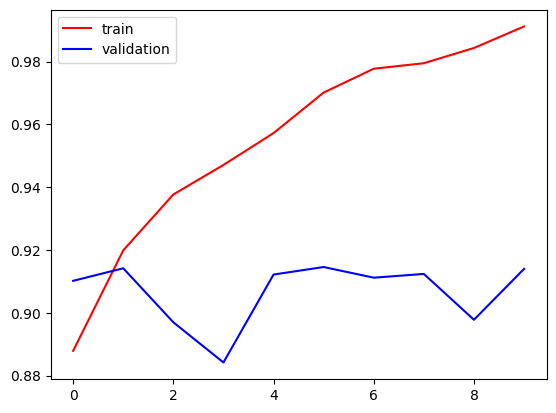

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

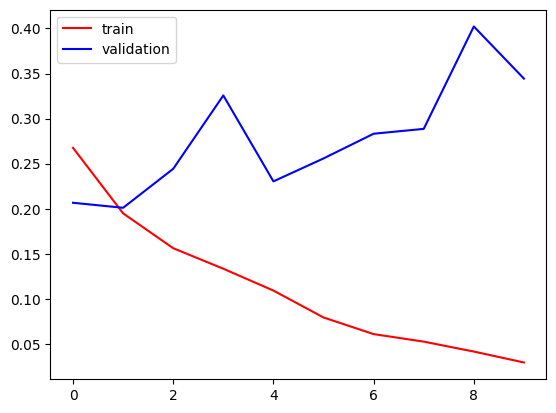

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

##**2) Fine Tuning**

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
tunned_model = Sequential()

tunned_model.add(conv_base)
tunned_model.add(Flatten())
tunned_model.add(Dense(256,activation='relu'))
tunned_model.add(Dense(1,activation='sigmoid'))

In [ ]:
tunned_model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
tunned_history = tunned_model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds
)

Epoch 1/10
625/625 [==============================] - 63s 99ms/step - loss: 2.7280 - accuracy: 0.7997 - val_loss: 0.2126 - val_accuracy: 0.9218
Epoch 2/10
625/625 [==============================] - 62s 98ms/step - loss: 0.1791 - accuracy: 0.9338 - val_loss: 0.2932 - val_accuracy: 0.9132
Epoch 3/10
625/625 [==============================] - 62s 98ms/step - loss: 0.1241 - accuracy: 0.9546 - val_loss: 0.1469 - val_accuracy: 0.9514
Epoch 4/10
625/625 [==============================] - 71s 114ms/step - loss: 0.0993 - accuracy: 0.9646 - val_loss: 0.1949 - val_accuracy: 0.9488
Epoch 5/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0691 - accuracy: 0.9764 - val_loss: 0.2087 - val_accuracy: 0.9430
Epoch 6/10
625/625 [==============================] - 61s 98ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.2668 - val_accuracy: 0.9496
Epoch 7/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0529 - accuracy: 0.9857 - val_loss: 0.6169 - val_accuracy

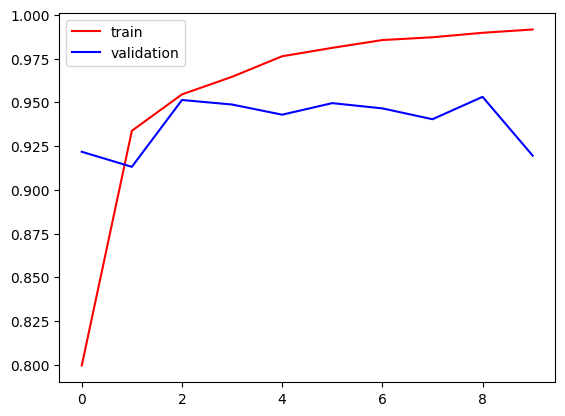

In [ ]:
plt.plot(tunned_history.history['accuracy'],color='red',label='train')
plt.plot(tunned_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

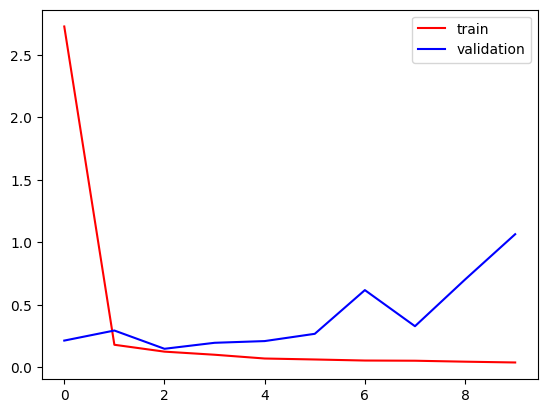

In [ ]:
plt.plot(tunned_history.history['loss'],color='red',label='train')
plt.plot(tunned_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Conclusion:
- Fine Tunned learning model have high accuracy as compared to Feature Extaction learned model.

- Accuracy of feature extraction model is 91.4
- Accuracy of fine tunned model is 91.9

In [ ]:
tunned_model.save("/content/cat_dog_classifier.h5")